### Evaluating the blip model finetuned on large captions using cooperhewitt image/captions dataset

In [1]:
!pip install peft
!pip install accelerate
!pip install bitsandbytes
!pip install datasets
!pip install evaluate
!pip install jiwer

In [3]:
# Check GPU is detected by CUDA
import torch
print(torch.cuda.is_available())

True


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from peft import PeftModel, PeftConfig

drive_link = '/content/drive/MyDrive/DLMM_Final_Project'

peft_model_id = drive_link + "/blip-image-captioning-base-finetune/checkpoint-11300"

peft_config = PeftConfig.from_pretrained(peft_model_id)

processor = BlipProcessor.from_pretrained(peft_config.base_model_name_or_path)

model = BlipForConditionalGeneration.from_pretrained(peft_config.base_model_name_or_path, load_in_8bit=True, device_map={"":0})

# Load the Lora model
model = PeftModel.from_pretrained(model, peft_model_id)
model.eval()

PeftModel(
  (base_model): LoraModel(
    (model): BlipForConditionalGeneration(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): Linear8bitLt(
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=768, out_features=32, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=32, out_features=2304, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
                  (lora_embed

In [8]:
import pandas as pd
from PIL import Image

df_train = pd.read_csv(drive_link + '/cooperhewitt-image-dataset/ids_train.csv')
df_test = pd.read_csv(drive_link + '/cooperhewitt-image-dataset/ids_test.csv')

train_images = [f"{drive_link}/cooperhewitt-image-dataset/media/{media_id}.jpg" for media_id in df_train['media_id'].to_list()]
test_images = [f"{drive_link}/cooperhewitt-image-dataset/media/{media_id}.jpg" for media_id in df_test['media_id'].to_list()]

## Testing on the test data image

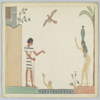

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

test_raw_image = Image.open(test_images[1]).convert('RGB').resize((100,100))
test_raw_image

In [10]:
inputs = processor(test_raw_image, return_tensors="pt").to(device)

pixel_values = inputs['pixel_values']
generated_ids = model.generate(pixel_values=pixel_values, max_length=100)
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

['a and a - in a - large, large, large, large, large, large, large, large, large, large, large, large, large, large, large, large, large, large, multi, multi, natural, la, la, la, la, la, la, la, la, the, la, the, the, la, la, the, the, the, the, the, the, the, the, the, the, the,']


## Testing on the train data image

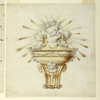

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_raw_image = Image.open(train_images[1]).convert('RGB').resize((100,100))
train_raw_image

In [12]:
inputs = processor(train_raw_image, return_tensors="pt").to(device)

pixel_values = inputs['pixel_values']
generated_ids = model.generate(pixel_values=pixel_values, max_length=100)
print(processor.batch_decode(generated_ids, skip_special_tokens=True))

['a and a - in a - large, large, large, large, large, large, large, large, large, large, large, large, large, large, large, natural, large, natural, natural, natural, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, person, person, person, person, person, person, the,']
